In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [5]:
math.e**(1j*5)

(0.28366218546322625-0.9589242746631385j)

In [14]:
def matrice_Fourier(N):
    F = np.zeros((N, N), dtype=np.complex128)
    for n in range(N):
        for w in range(N):
            F[n, w] = math.e**(-2j * np.pi * n * w / N)
    return (1/N)*F        

Este matricea Fourier unitara: False


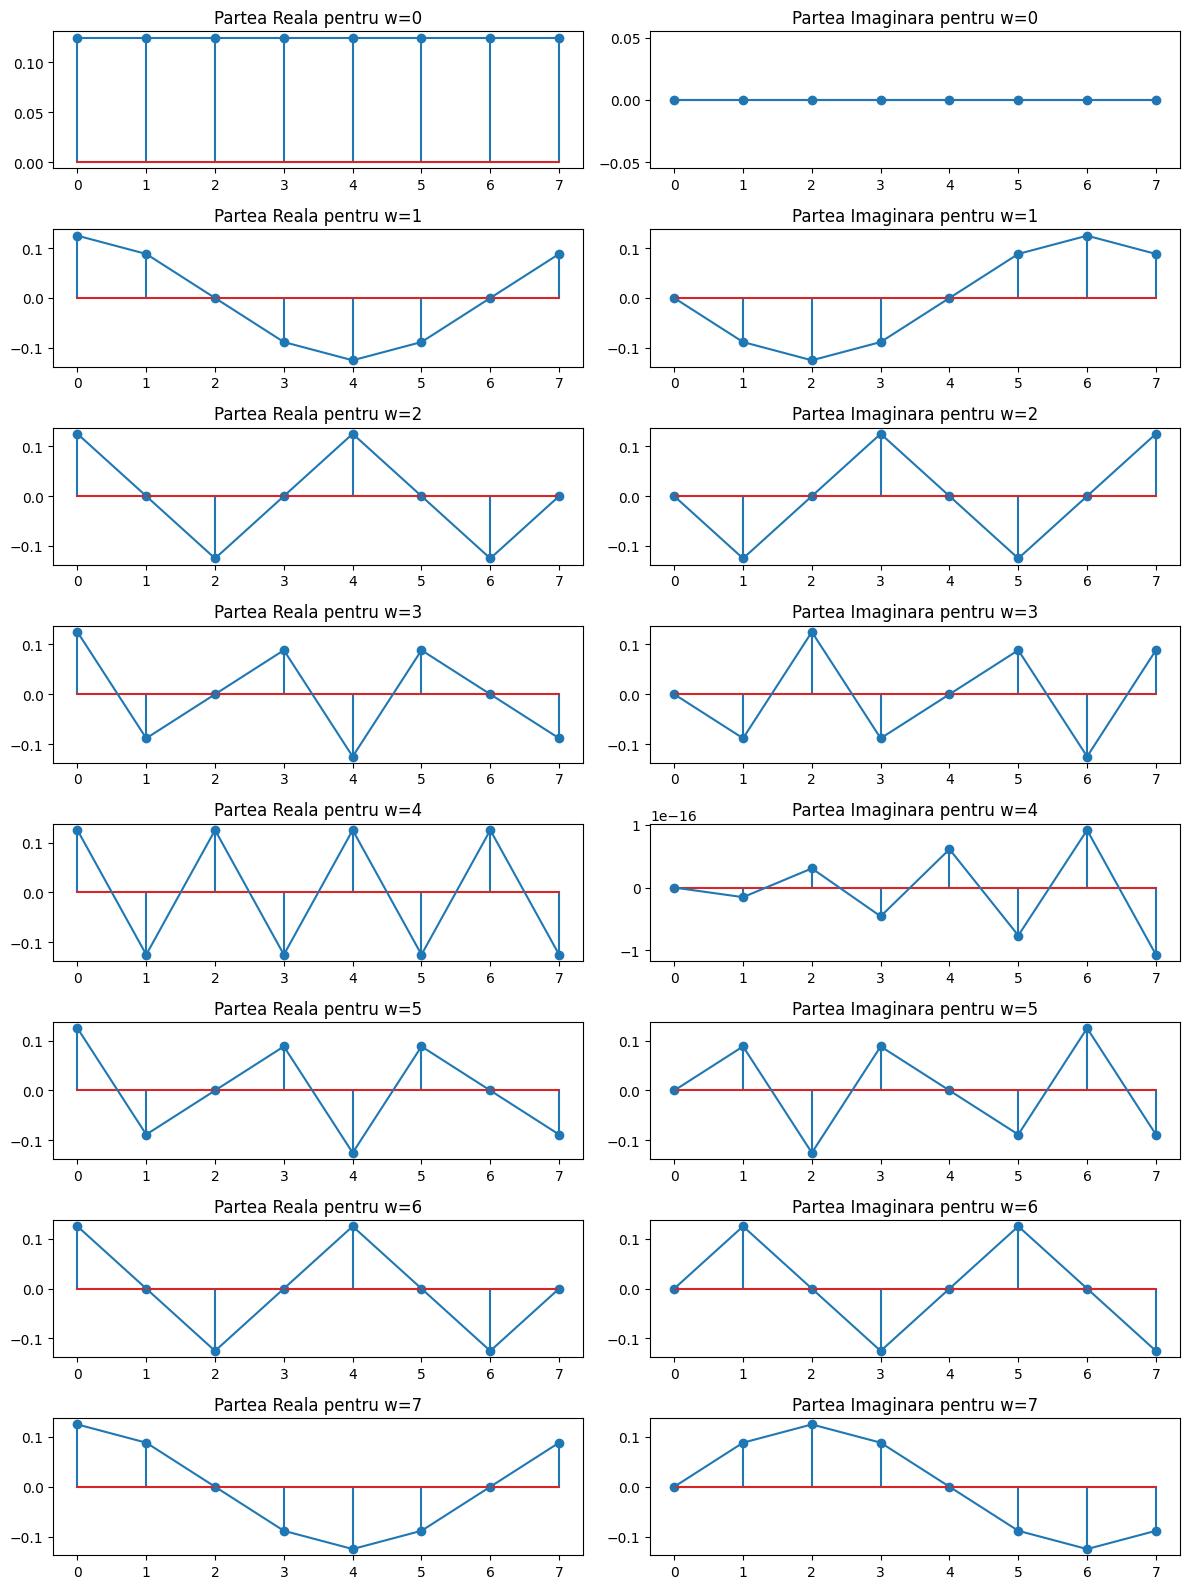

In [71]:
# X[w] =  suma n=0 la N-1 (x[n]*math.e **((-2*j*pi*n*w)/N)
# In cadrul exercitiilor de astazi veti calcula 'de mana' transformata Fourier
# pentru un semnal sinusoidal (fara a folosi functiile numpy.fft sau scipy.fft,
# ci implementand relatia (1) prima data cu cicluri repetitive explicite si apoi cu
# matricea Fourier si produs matrice-vector).
# 1. Pentru N = 8 creati matricea Fourier. Desenati pe subplot-uri diferite
# pentru fiecare linie partea reala si partea imaginara. Verificati ca matricea
# Fourier este unitara (complexa si ortogonala).

N = 8
F = matrice_Fourier(N)

# Calculam partea reala si partea imaginara
real_part = np.real(F)
imaginary_part = np.imag(F)

# Verificam daca matricea Fourier este unitara
unitary = np.linalg.norm(np.abs(np.dot(F, F.T.conj()) - N * np.eye(N)))
print("Este matricea Fourier unitara:", unitary < 10**(-4))

fig, axes = plt.subplots(N, 2, figsize=(12, 2*N))
for w in range(N):
    real_part = np.real(F[w])
    imaginary_part = np.imag(F[w])
    
    axes[w, 0].stem(real_part)
    axes[w, 0].plot(real_part)
    axes[w, 0].set_title(f'Partea Reala pentru w={w}')
    
    axes[w, 1].stem(imaginary_part)
    axes[w, 1].plot(imaginary_part)
    axes[w, 1].set_title(f'Partea Imaginara pentru w={w}')

plt.tight_layout()
plt.show()

TypeError: Axes.stem() got an unexpected keyword argument 'color'

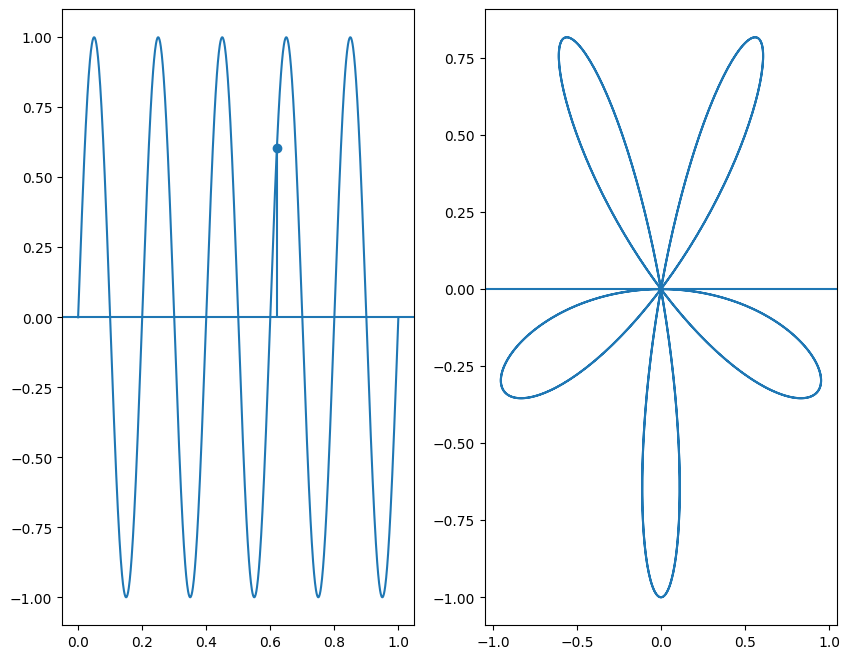

In [70]:
fs = 1000
f = 5
n = 620
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * f * t)
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0].plot(t,x)
axes[0].axhline()
axes[0].stem(t[n],x[n])

y = x * math.e**(-2*np.pi*1j*t)
axes[1].plot(y.real,y.imag)
axes[1].axhline()
axes[1].stem(y[n].real, y[n].imag)
plt.show()




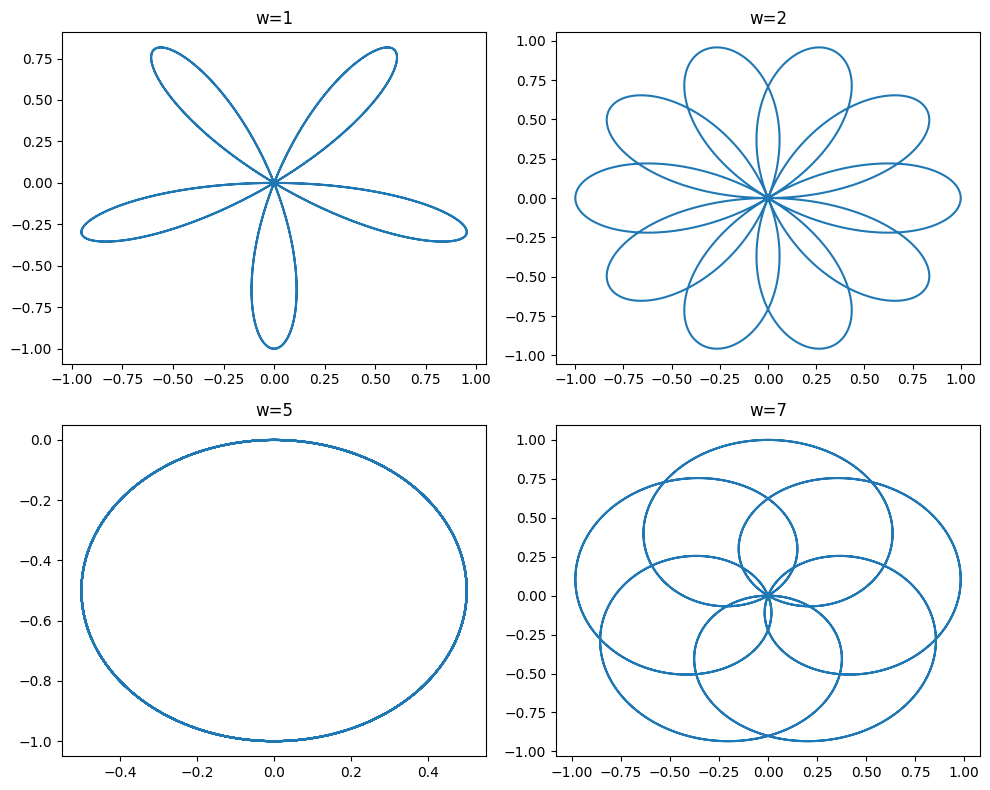

In [53]:

w_val = [1,2,5,7]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

y1 = x * math.e **(-2*np.pi*1j*t*w_val[0])
y2 = x * math.e **(-2*np.pi*1j*t*w_val[1])
y3 = x * math.e **(-2*np.pi*1j*t*w_val[2])
y4 = x * math.e **(-2*np.pi*1j*t*w_val[3])

axes[0, 0].plot(y1.real,y1.imag)
axes[0, 0].set_title(f'w={w_val[0]}')

axes[0, 1].plot(y2.real,y2.imag)
axes[0, 1].set_title(f'w={w_val[1]}')    

axes[1, 0].plot(y3.real,y3.imag)
axes[1, 0].set_title(f'w={w_val[2]}')

axes[1, 1].plot(y4.real,y4.imag)
axes[1, 1].set_title(f'w={w_val[3]}')

plt.tight_layout()
plt.show()
